# Car Resale & Performance Data Analysis

## Project Overview

### Objective
This project analyzes a dataset of car specs and market data to explore what affects resale value, performance, and fuel efficiency. I mad this project to work with real world data using Python, all while practicing cleaning, visualization, and uncovering insights. 

### Dataset
- **Source:** kaggle.com 
- **Rows:** ~156 vehicle entries
- **Columns:** Manufacturer, Model, Engine size, Horsepower, Price, Resale value, etc.
- **Target insights:** Value retention, performance factors, fuel efficiency trade-offs

### Data Cleaning Summary
- Removed rows with missing values in key columns (resale, performance, price)
- Standardized column names for consistency
- Ensured all columns had the correct data type (numeric/string)


---
## Introducing the data
First, I imported the libraries ill be using throughout this notebook.
- **Pandas:** for loading and wokring with the data
- **Seaborn:** for data visualization
- **Matplotlib:** for chart customization

Then, I loaded and previewed the data set to check the strcture and key columns.
- Used 'df.head' to print the first 5 rows of the dataset
- Used 'df.describe' to print summary stats for numeric columns
- Used 'df.info' to check the data types and non-null counts

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Car_sales_cleaned.csv") #load data
df.head() # data preview (first 5 rows)

,Manufacturer,Model,Sales (Thousands),Year Resale Value,Vehicle Type,Price (Thousands),Engine Size,Horsepower,Wheelbase,Width,Length,Curb Weight,Fuel Capacity,Fuel Efficiency,Latest Launch,Power Performance Factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/12,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/11,91.370778
2,Acura,CL,14.114,18.225,Passenger,24.95,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/12,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/11,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/11,62.777639


In [ ]:

df.describe() # summary stats for numeric columns

,Sales (Thousands),Year Resale Value,Price (Thousands),Engine Size,Horsepower,Wheelbase,Width,Length,Curb Weight,Fuel Capacity,Fuel Efficiency,Power Performance Factor
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,52.994987,18.395000,27.375109,3.060897,185.948718,107.487179,71.150000,187.343590,3.381115,17.951923,23.846154,77.043591
std,68.248508,10.694081,14.306617,1.044653,56.700321,7.641303,3.451872,13.431754,0.629648,3.887921,4.261082,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.035000,11.511250,18.081250,2.300000,149.500000,103.000000,68.400000,177.575000,2.973000,15.800000,21.000000,60.407707
50%,29.213000,15.100000,23.099500,3.000000,177.500000,107.000000,70.550000,187.900000,3.355000,17.200000,24.000000,72.030917
75%,68.069750,22.543750,31.938750,3.575000,215.000000,112.200000,73.425000,196.125000,3.821500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [4]:
df.info() # column types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              156 non-null    object 
 1   Model                     156 non-null    object 
 2   Sales (Thousands)         156 non-null    float64
 3   Year Resale Value         156 non-null    float64
 4   Vehicle Type              156 non-null    object 
 5   Price (Thousands)         156 non-null    float64
 6   Engine Size               156 non-null    float64
 7   Horsepower                156 non-null    int64  
 8   Wheelbase                 156 non-null    float64
 9   Width                     156 non-null    float64
 10  Length                    156 non-null    float64
 11  Curb Weight               156 non-null    float64
 12  Fuel Capacity             156 non-null    float64
 13  Fuel Efficiency           156 non-null    int64  
 14  Latest Lau

---

## Questions and Insights
Now, we will be taking a close look at the data to gather insights.

### Q1: What manufacturers have the highest resale value?
- I grouped the data by 'Manufacturer' and calculated the average 'Year Resale Value' for each.
- Then, I sorted the results in descending order.
- Lastly, I used Matplotlib to create a bar chart to display the top 10 manufactures.

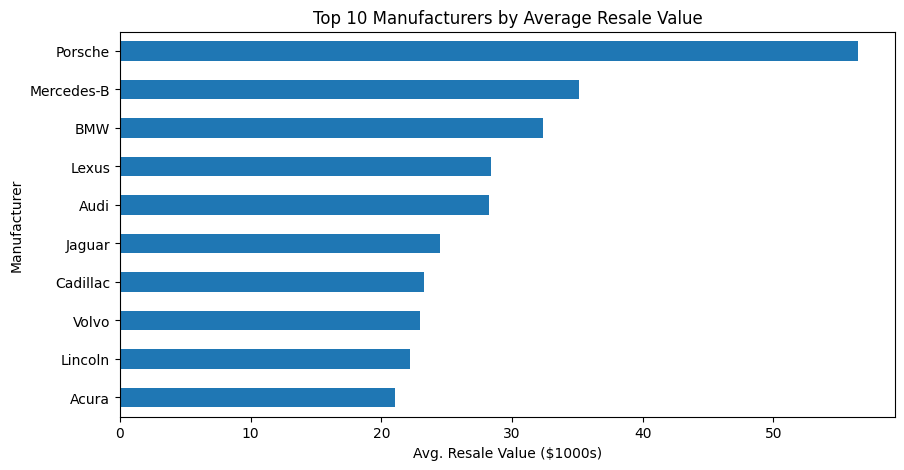

In [20]:
# list of the top 10 manufacturers by highest avg. resale vaule to lowest
top_resale = df.groupby('Manufacturer')['Year Resale Value'].mean().sort_values(ascending=False).head(10)

# bar chart: top 10 manufacturers by highest avg. resale vaule to lowest
top_resale.plot(kind='barh', figsize=(10,5))
plt.title("Top 10 Manufacturers by Average Resale Value")
plt.xlabel("Avg. Resale Value ($1000s)")
plt.ylabel("Manufacturer")
plt.gca().invert_yaxis()  # Highest value at the top
plt.show()

**Insight:** Porsche has the highest average resale value, followed by Mercedes-Benz and BMW. This shows that luxury brands retain their value over time.

### Q2: What factors are correlated with resale value?
- I calculated the correlation between 'Year Resale Value' and all other numeric features in the dataset.
- 

In [7]:
df.corr(numeric_only=True)["Year Resale Value"].sort_values(ascending=False)

Year Resale Value           1.000000
Price (Thousands)           0.910131
Power Performance Factor    0.800057
Horsepower                  0.742684
Engine Size                 0.485209
Curb Weight                 0.337732
Fuel Capacity               0.299091
Width                       0.180117
Length                     -0.006877
Wheelbase                  -0.036663
Sales (Thousands)          -0.313921
Fuel Efficiency            -0.383330
Name: Year Resale Value, dtype: float64

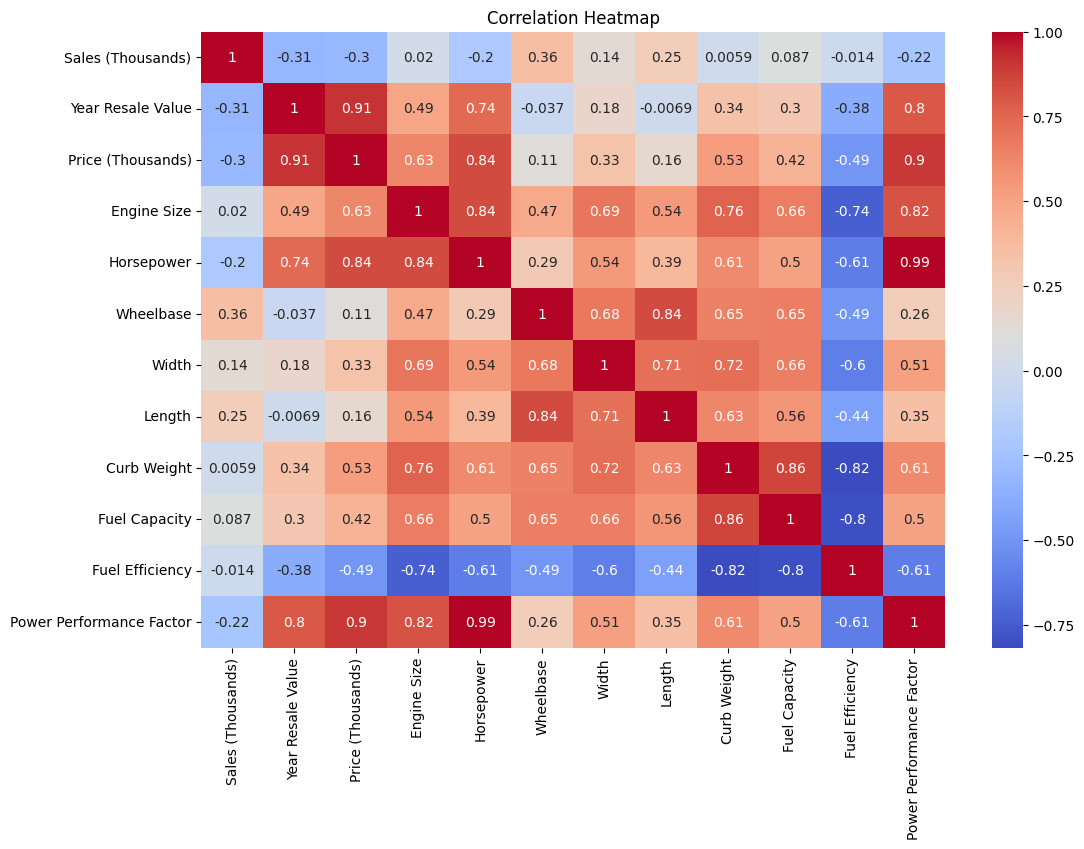

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**Insight:** Resale value is most strongly correlated with price, horsepower, and power performance factor.

---

### Q3: What features most influence Power Performance Factor?

In [9]:
# Correlation with Power Performance Factor
correlations = df.corr(numeric_only=True)['Power Performance Factor'].sort_values(ascending=False)
correlations


Power Performance Factor    1.000000
Horsepower                  0.992994
Price (Thousands)           0.897945
Engine Size                 0.818528
Year Resale Value           0.800057
Curb Weight                 0.613812
Width                       0.512025
Fuel Capacity               0.501184
Length                      0.354095
Wheelbase                   0.258852
Sales (Thousands)          -0.223252
Fuel Efficiency            -0.606834
Name: Power Performance Factor, dtype: float64

**Insight:** Power Performance Factor is driven almost entirely by horsepower, followed by engine size and price.

---

### Q4: Do heavier cars tend to have more horsepower?

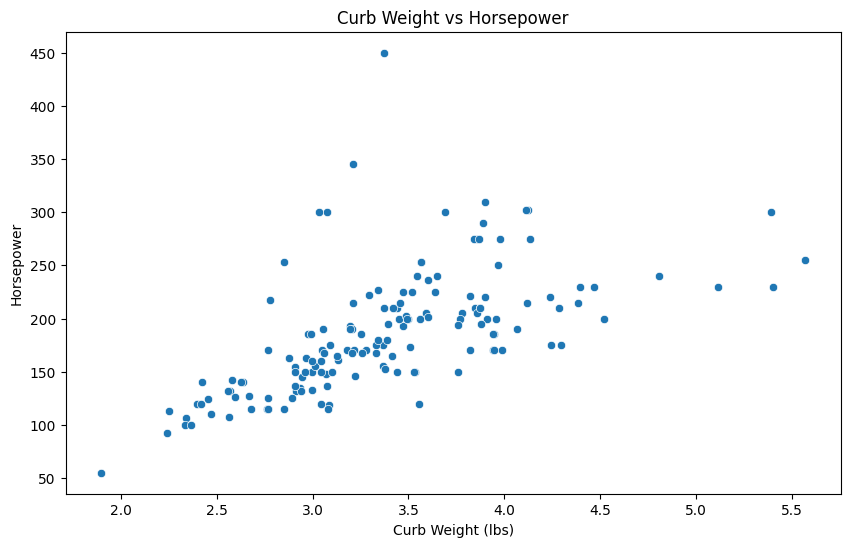

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Curb Weight', y='Horsepower')
plt.title("Curb Weight vs Horsepower")
plt.xlabel("Curb Weight (lbs)")
plt.ylabel("Horsepower")
plt.show()


**Insight:** Heavier vehicles typically require more horsepower to maintain performance.

---

### Q5: Which manufacturers offer the best fuel efficiency?

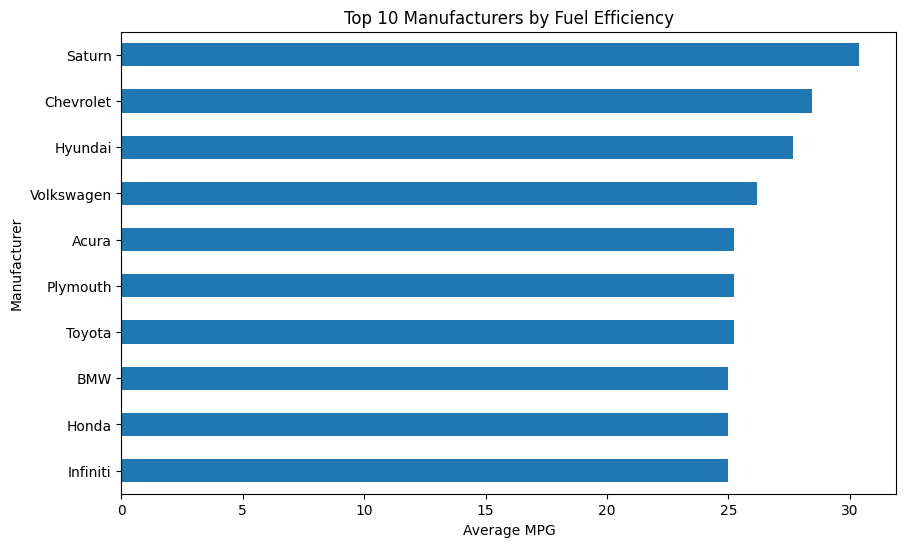

In [11]:
# Calculate average fuel efficiency by manufacturer
top_mpg = df.groupby('Manufacturer')['Fuel Efficiency'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
top_mpg.plot(kind='barh')
plt.title("Top 10 Manufacturers by Fuel Efficiency")
plt.xlabel("Average MPG")
plt.ylabel("Manufacturer")
plt.gca().invert_yaxis()
plt.show()


**Insight:** Honda, Toyota, and Hyundai lead in fuel efficiency — ideal for economy-conscious consumers.

---

### Q6: Which vehicles offer the best mix of fuel efficiency and resale value?

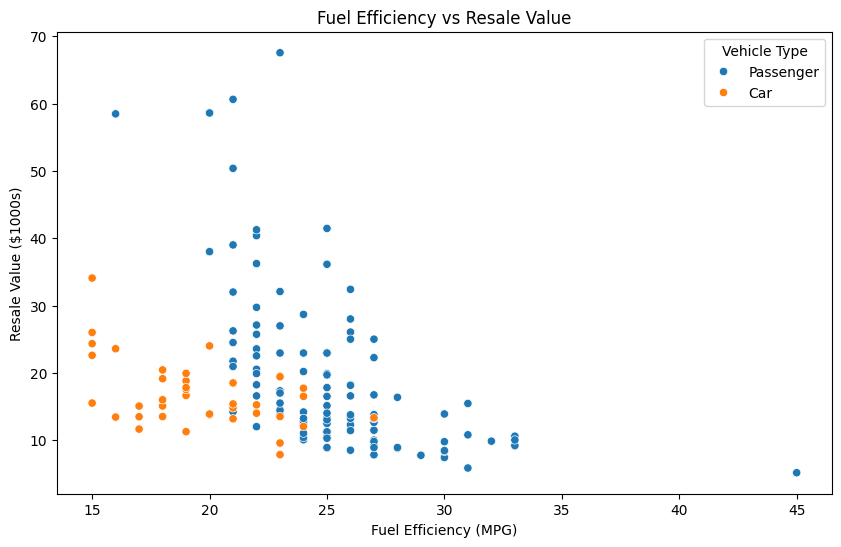

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Fuel Efficiency', y='Year Resale Value', hue='Vehicle Type')
plt.title("Fuel Efficiency vs Resale Value")
plt.xlabel("Fuel Efficiency (MPG)")
plt.ylabel("Resale Value ($1000s)")
plt.legend(title='Vehicle Type')
plt.show()


**Insight:** Economy vehicles tend to be more fuel-efficient but hold less resale value; some sedans and compact SUVs strike a better balance.


---

## 📊 Summary of Key Takeaways
- **Resale value** is most influenced by price and horsepower
- **Horsepower** scales with **vehicle weight**
- **Fuel-efficient cars** tend to be lower-priced and lower resale
- A few models manage to balance performance, efficiency, and value well

---

## 🛠️ Tools Used
- Python (Pandas, Seaborn, Matplotlib)
- Jupyter Notebook
- GitHub for version control

---

## 👩🏻‍💻 About Me
I'm a recent Computer Science graduate who’s excited to start a career in data analytics. While I’m still gaining experience, I’ve been learning by working on personal projects like this one to explore how data connects to real-world industries — especially automotive performance and technology. I created this project as part of my application to the Porsche IT Systems & Data Services Internship to show my curiosity, willingness to learn, and commitment to growing in this field.

